# Import dependencies

In [6]:
import mediapipe as mp
import cv2
import csv
import os
import numpy as np
import pandas as pd
import glob

# Create landmark detection and csv

In [3]:
mp_drawing = mp.solutions.drawing_utils #Drawing Helpers
mp_hands = mp.solutions.hands #mediapipe solution

In [4]:

cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands=1, min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as hands:

    while cap.isOpened():
        ret, frame = cap.read()
        

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        results = hands.process(image)
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        #results = hands.process(image)

        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                    mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),)


        cv2.imshow('Webcam Feed', image)
        #cv2.waitKet(3000)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

num_coords = len(hand.landmark)
#print(num_coords)



landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]





with open('hand_coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)



cv2.destroyAllWindows()


In [5]:
num_coords = len(hand.landmark)
#print(num_coords)

landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]



with open('hand_coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)


# Extract landmarks from dataset

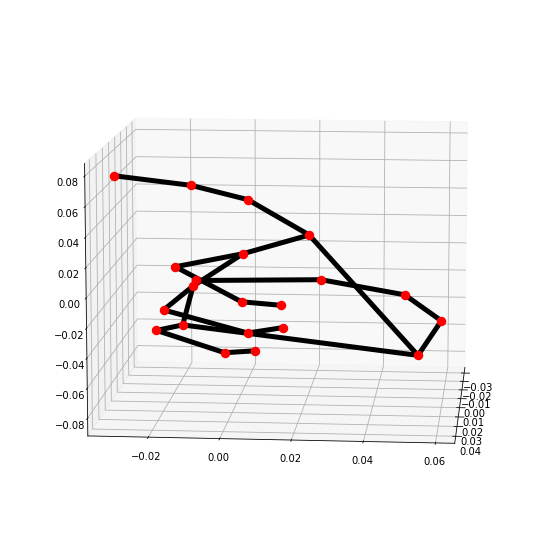

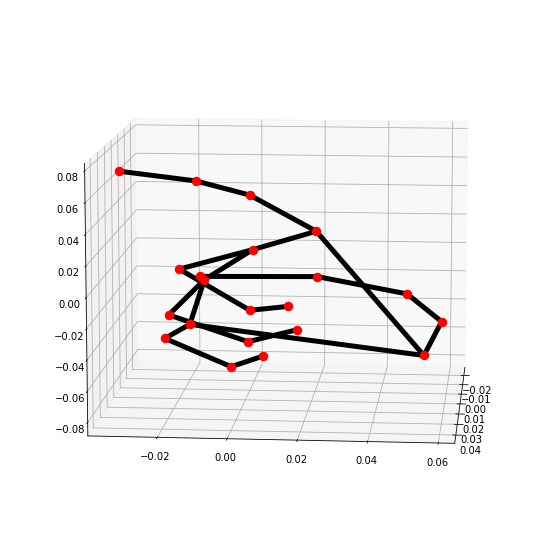

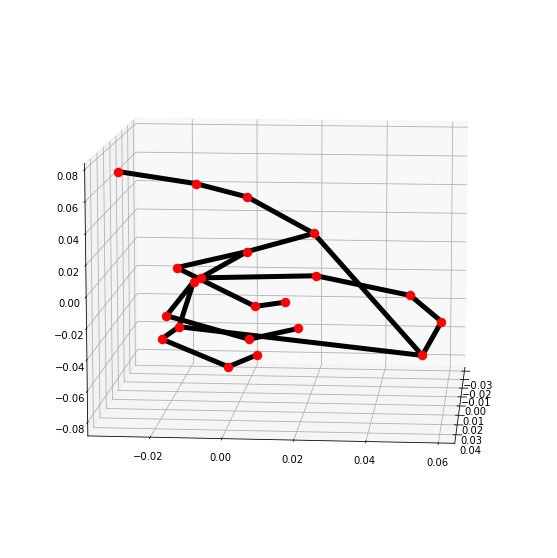

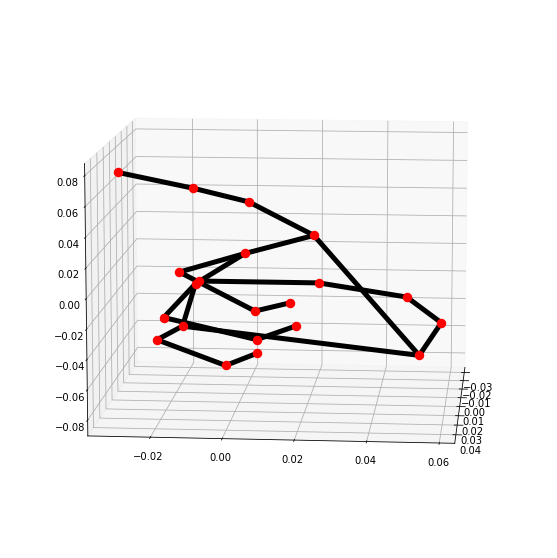

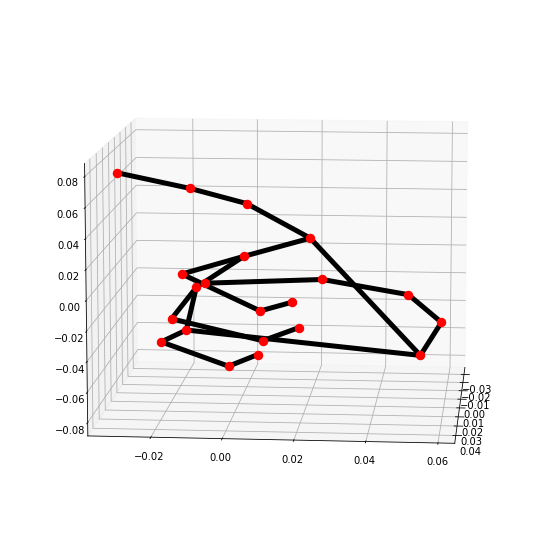

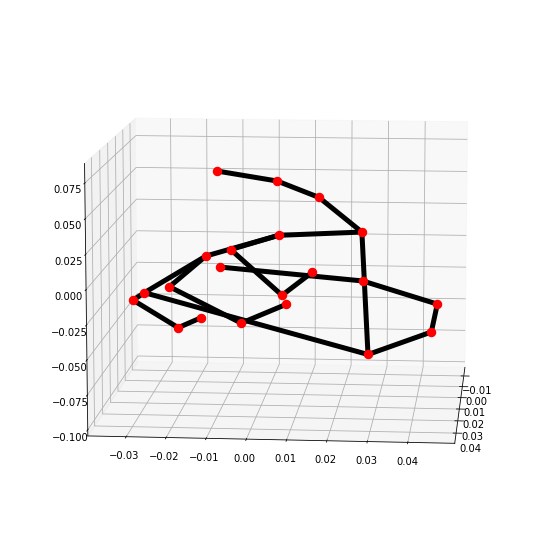

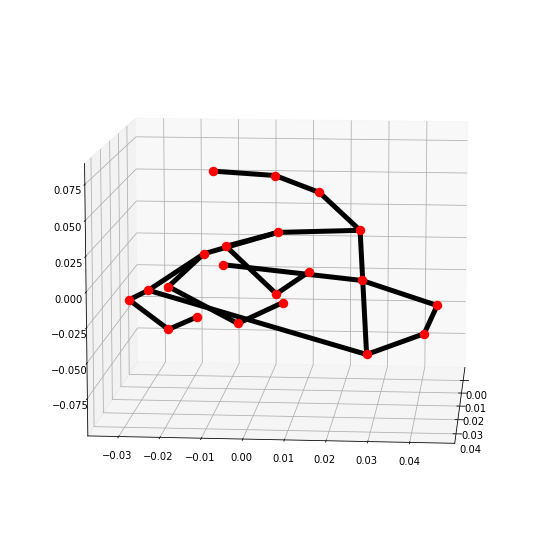

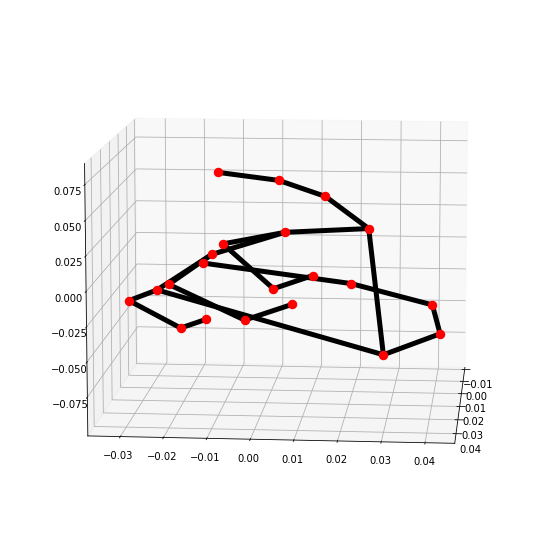

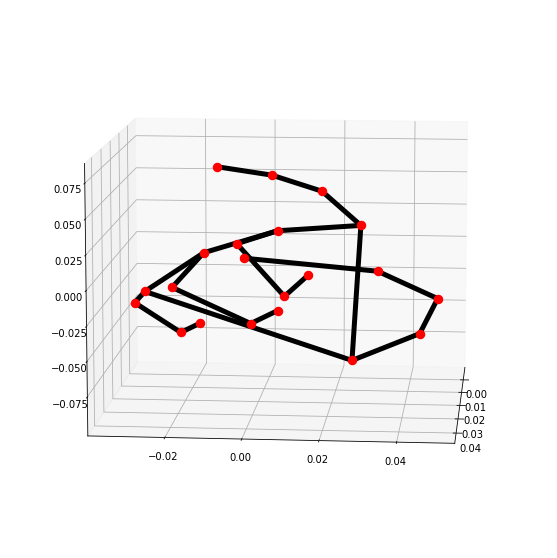

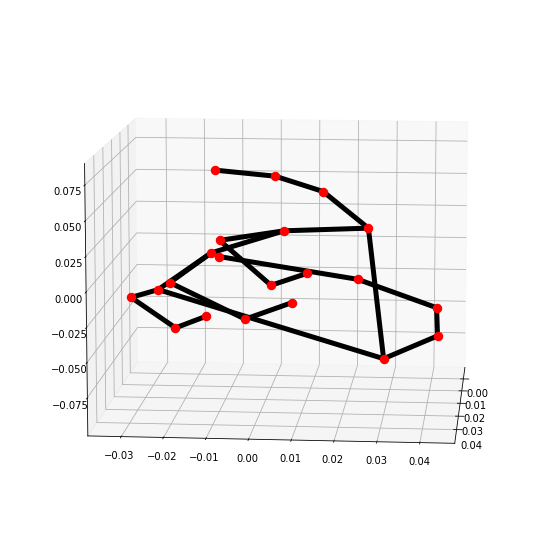

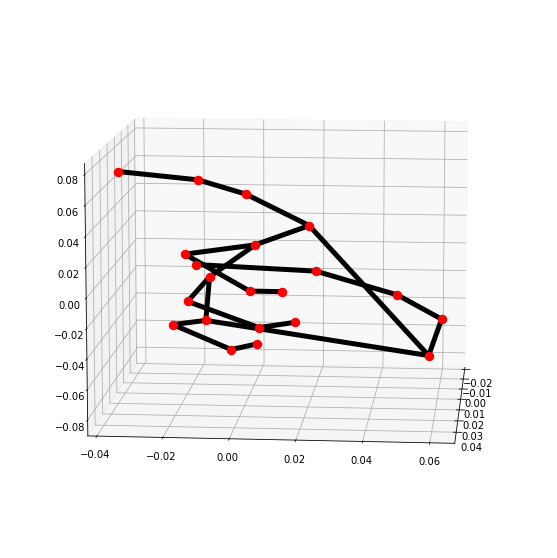

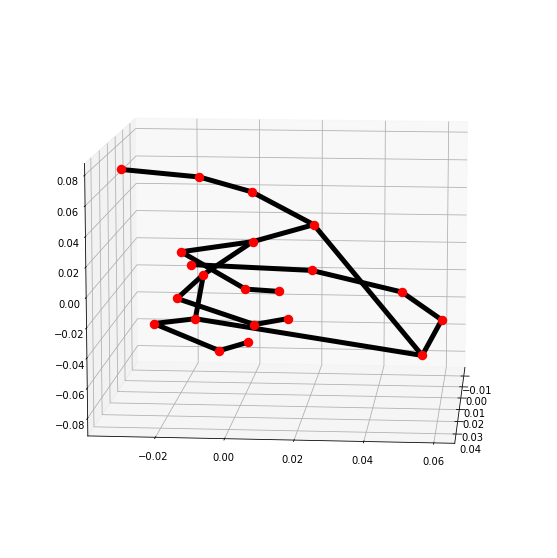

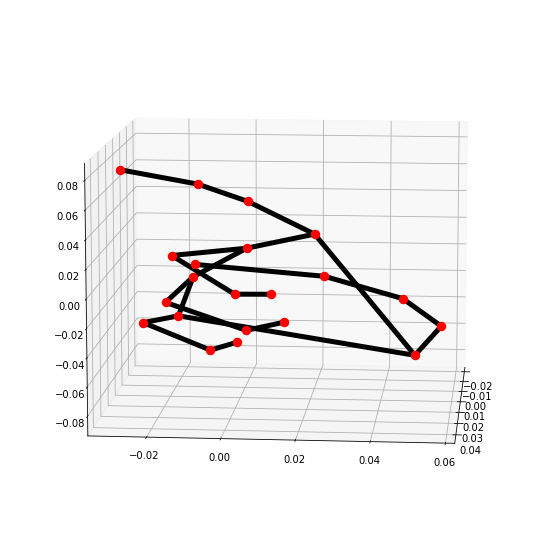

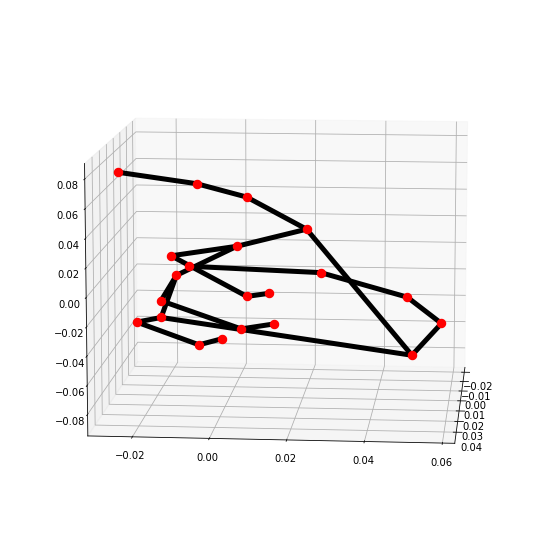

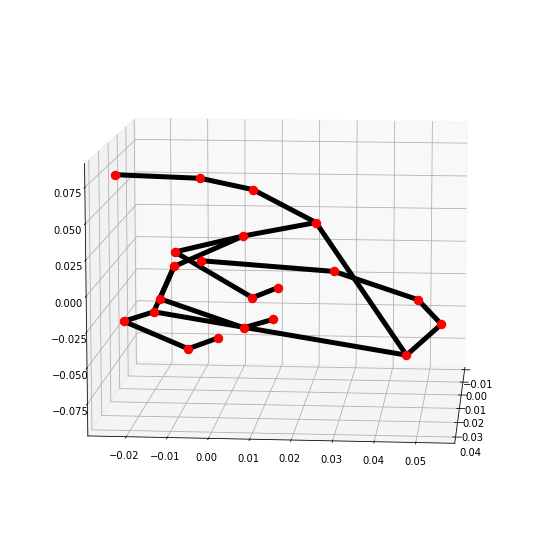

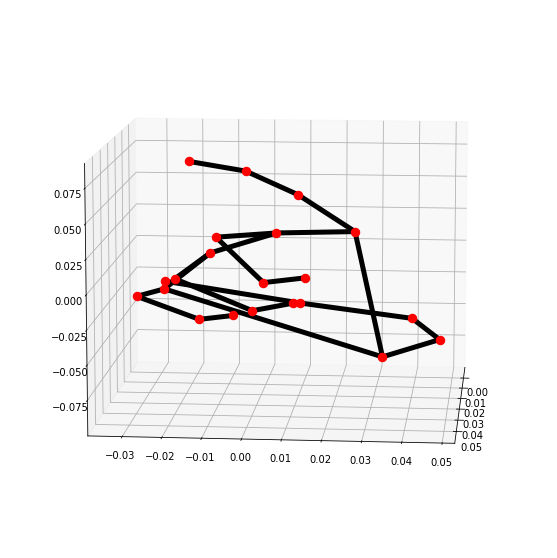

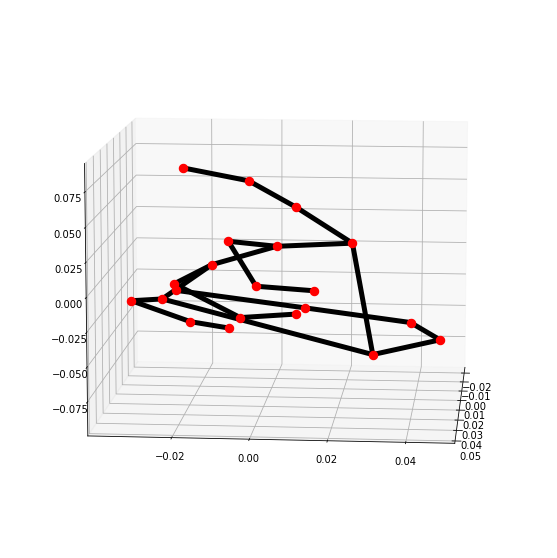

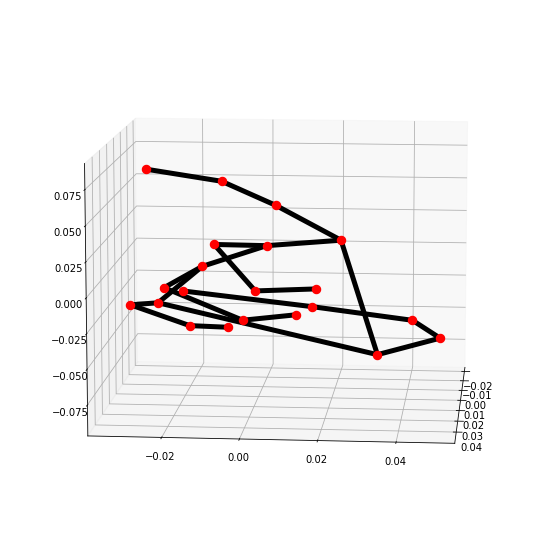

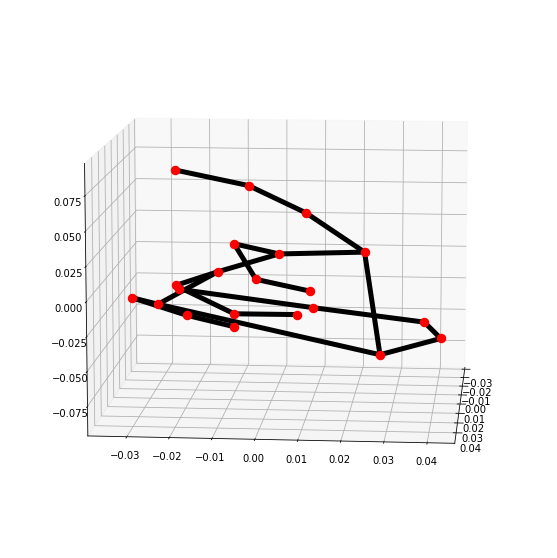

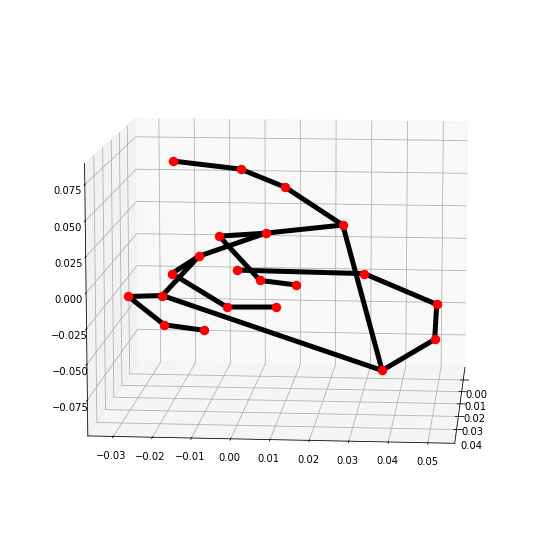

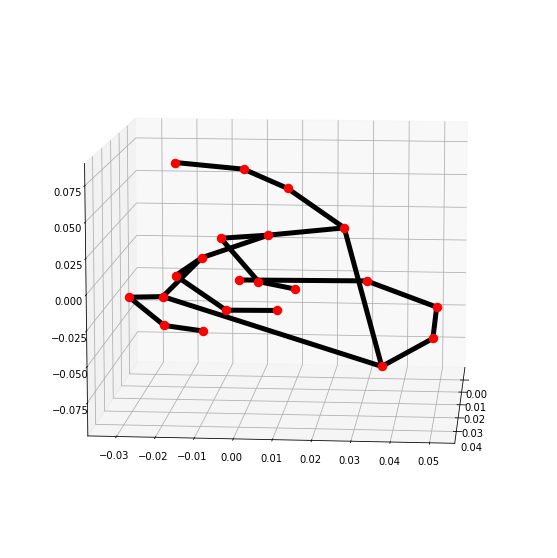

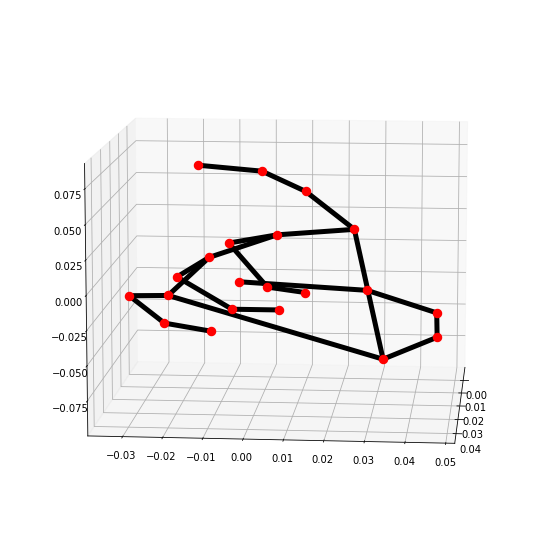

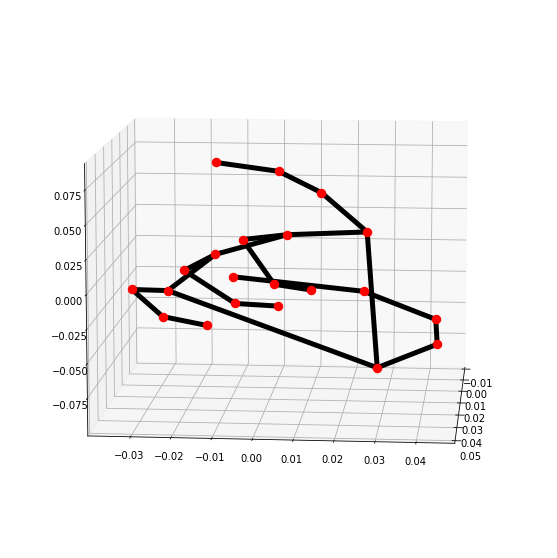

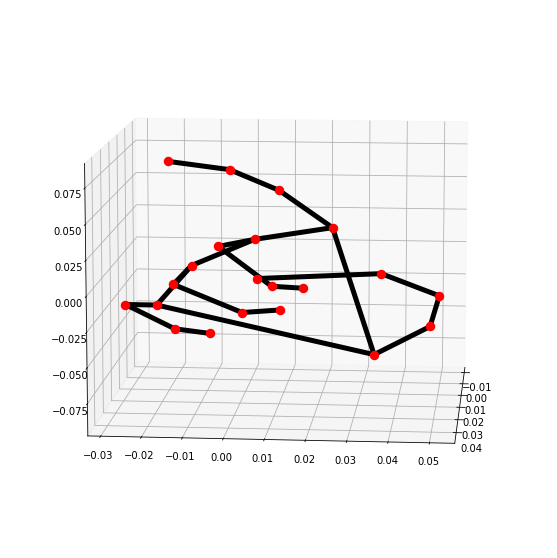

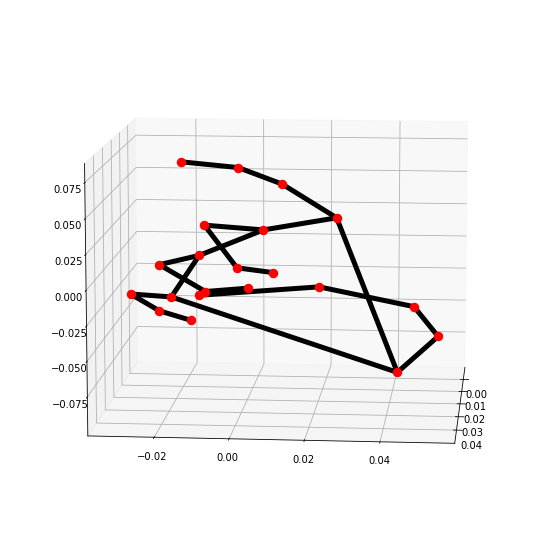

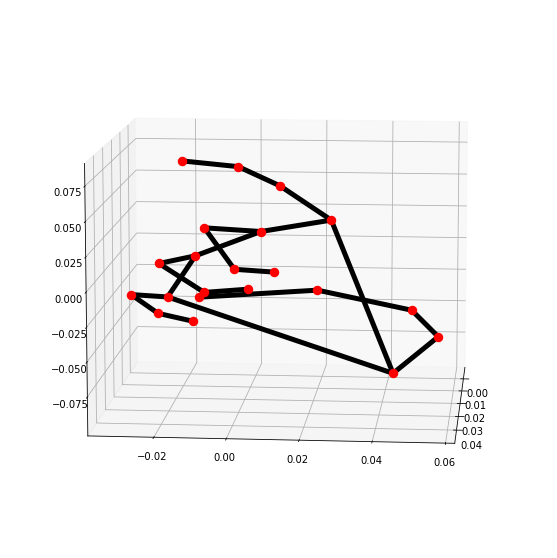

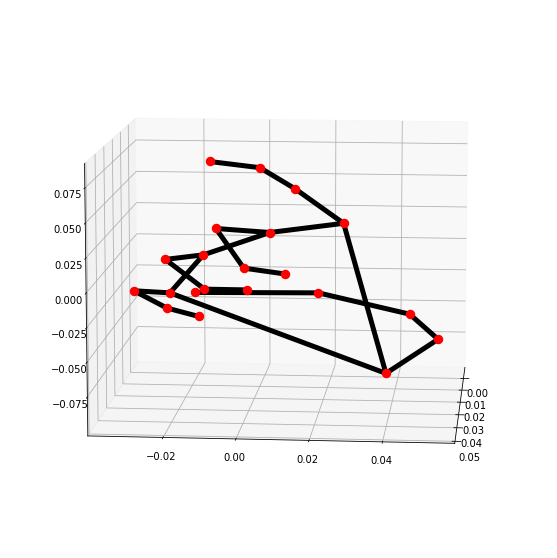

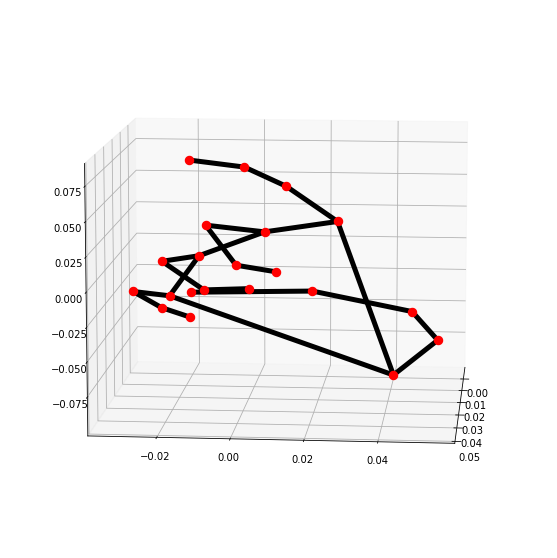

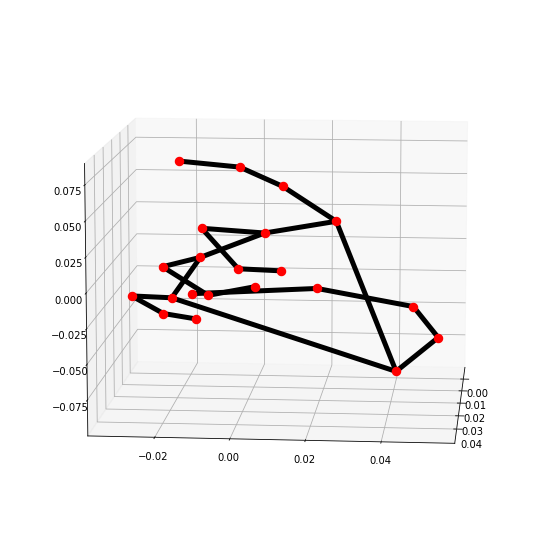

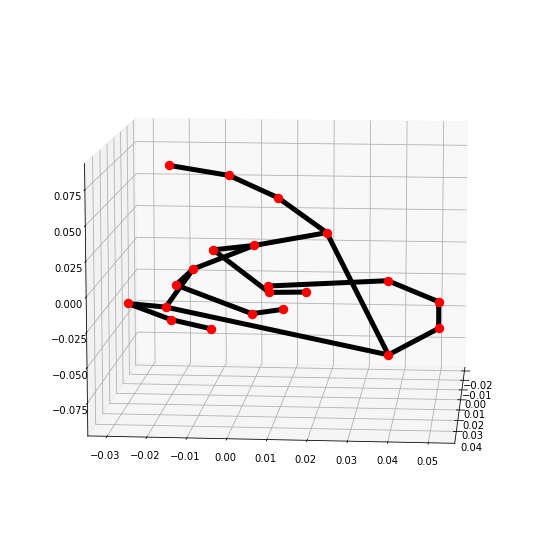

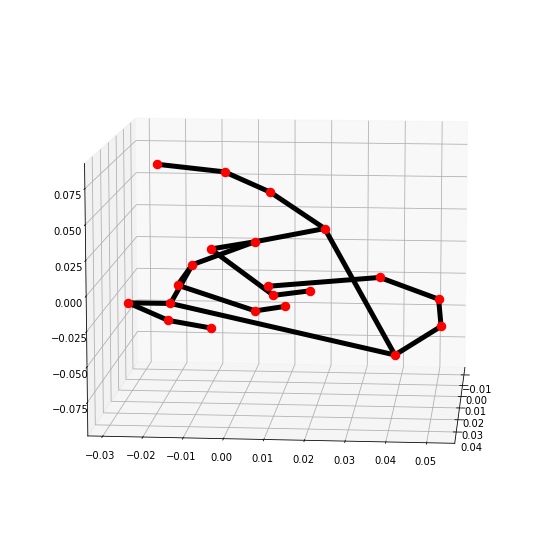

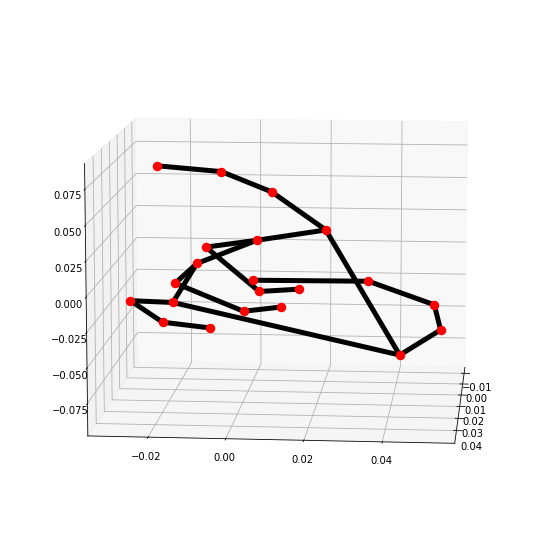

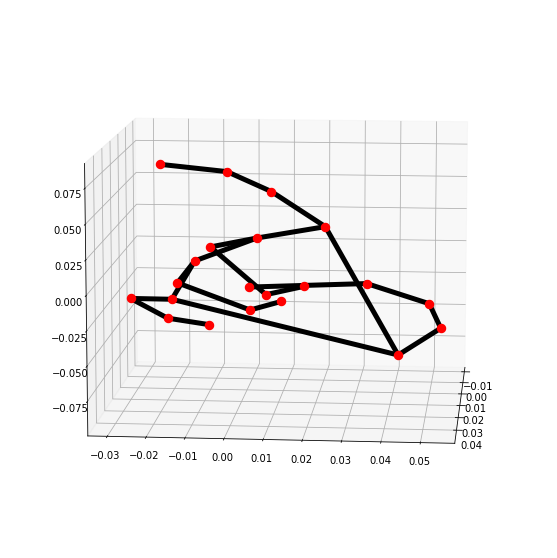

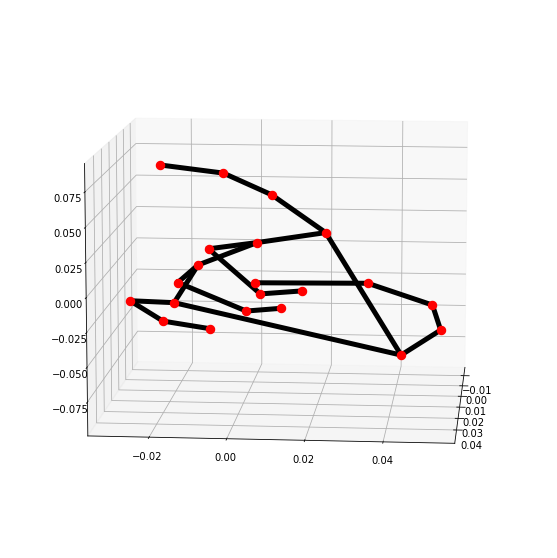

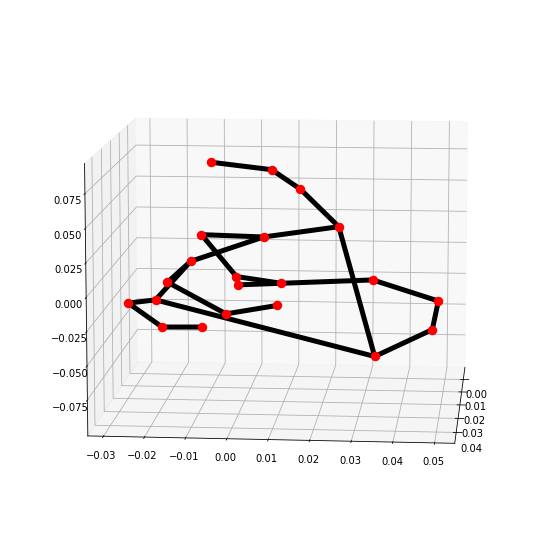

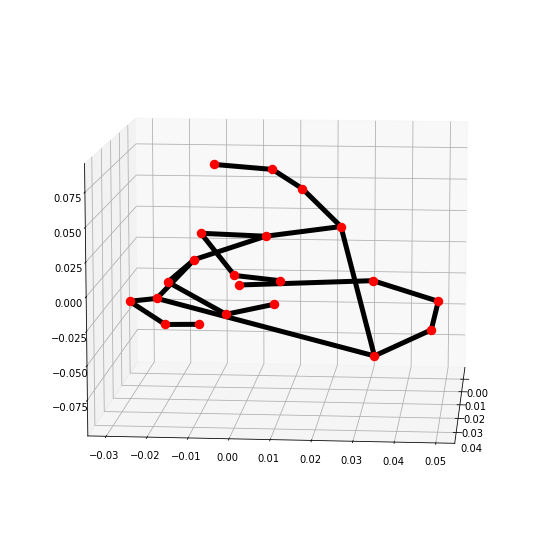

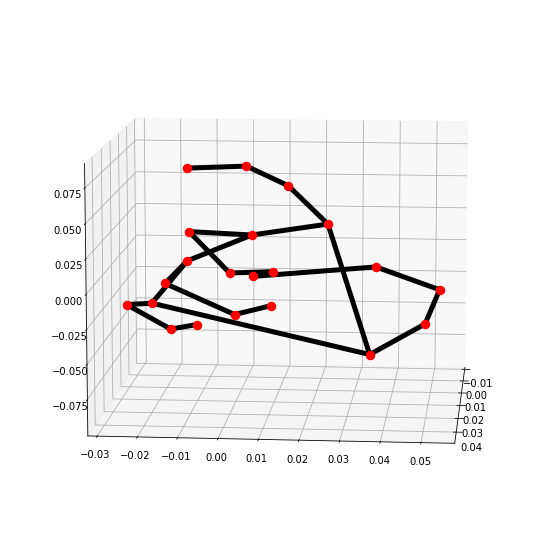

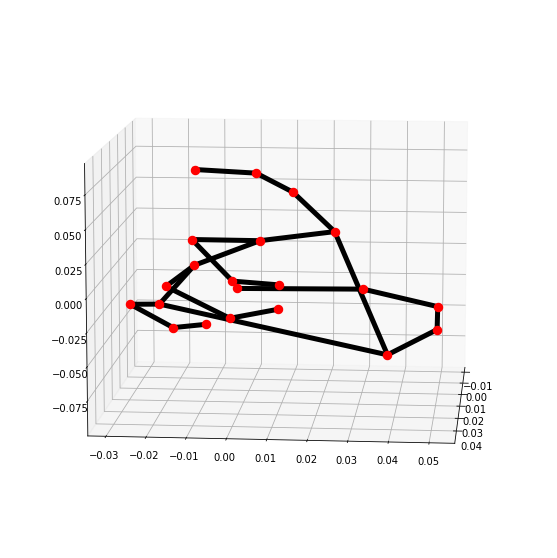

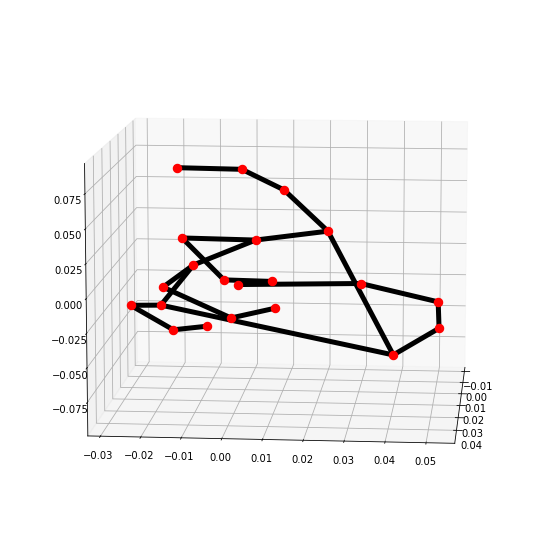

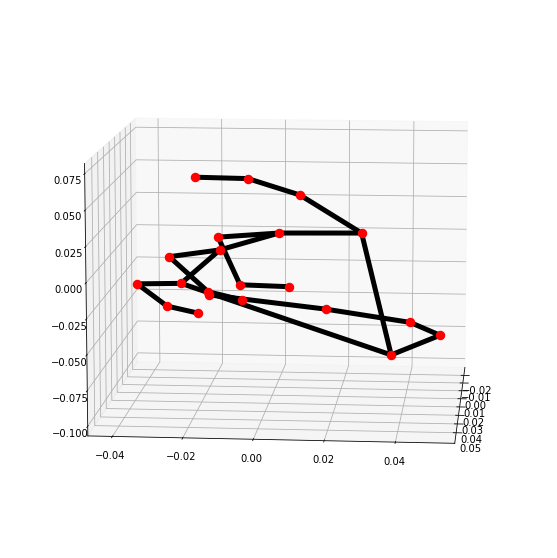

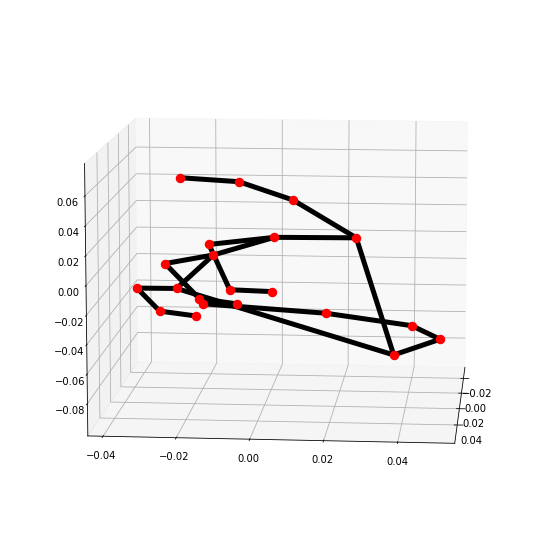

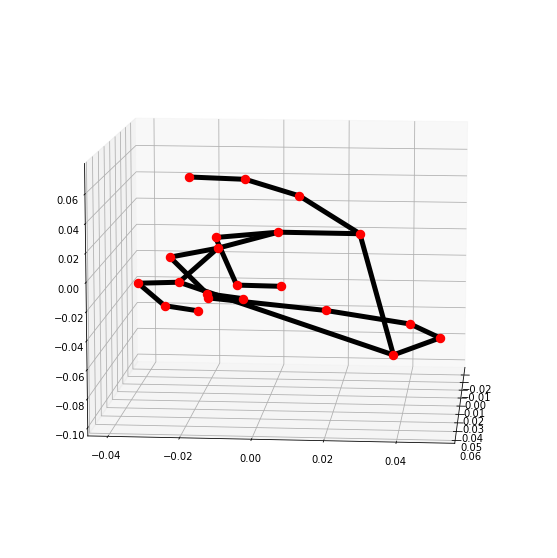

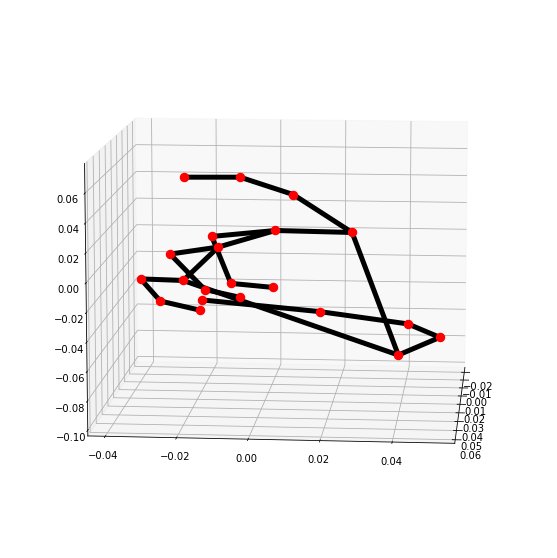

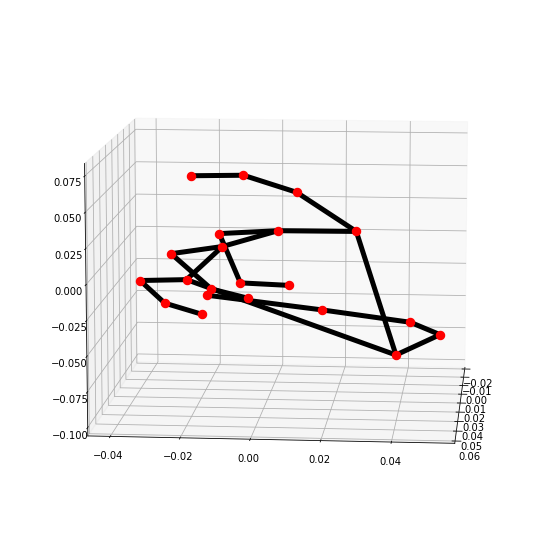

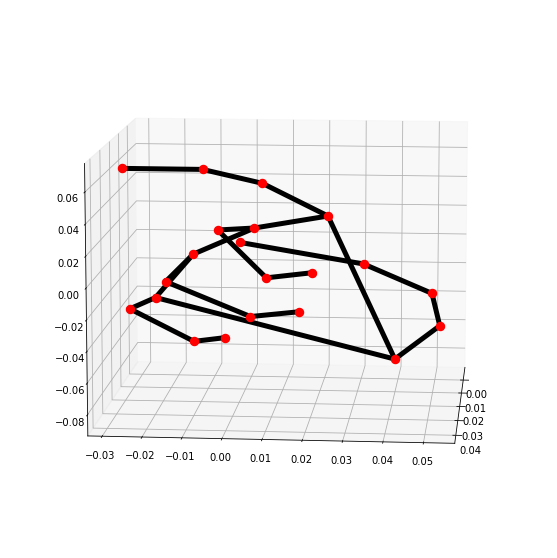

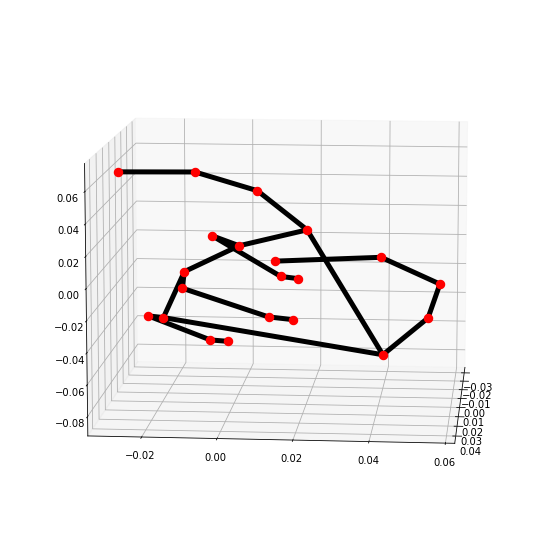

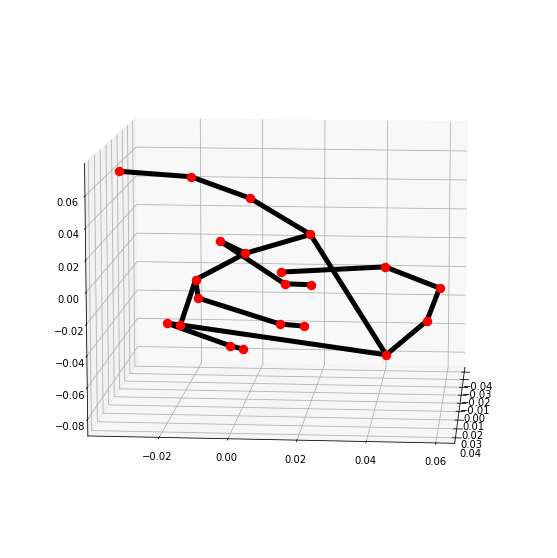

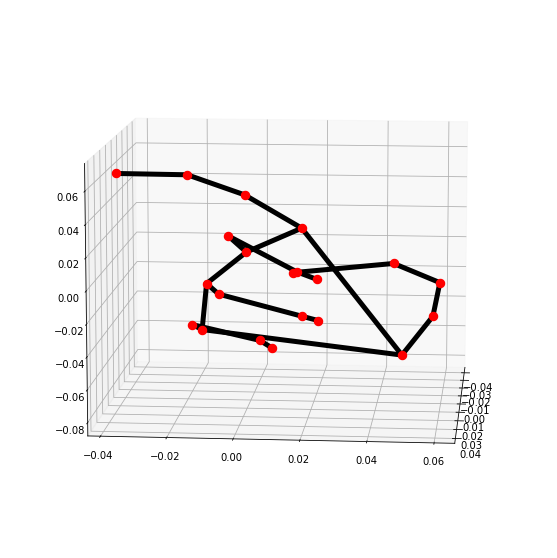

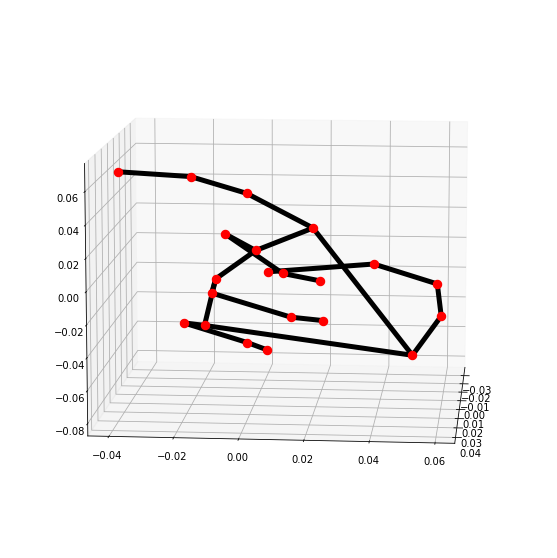

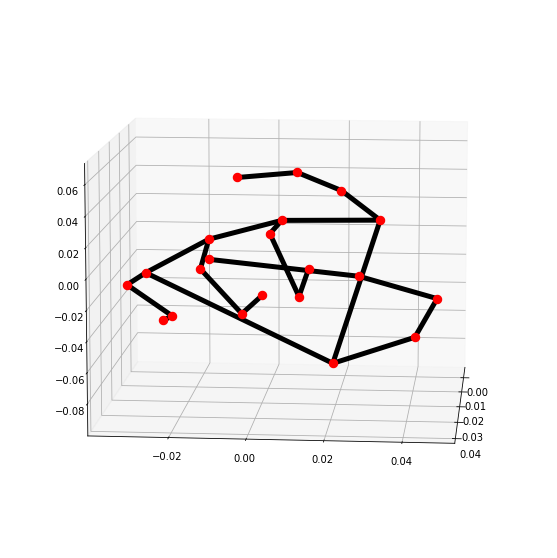

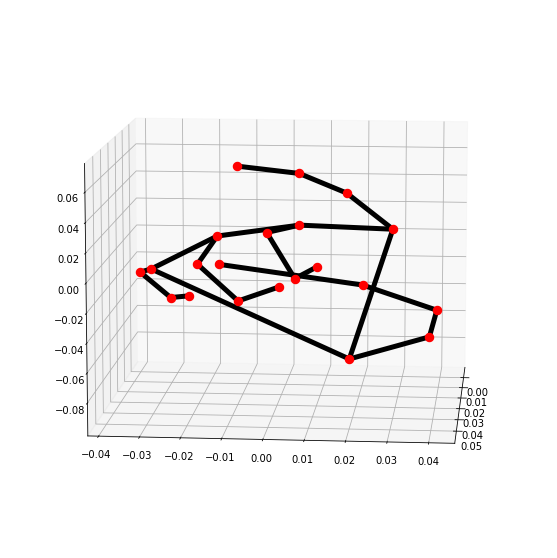

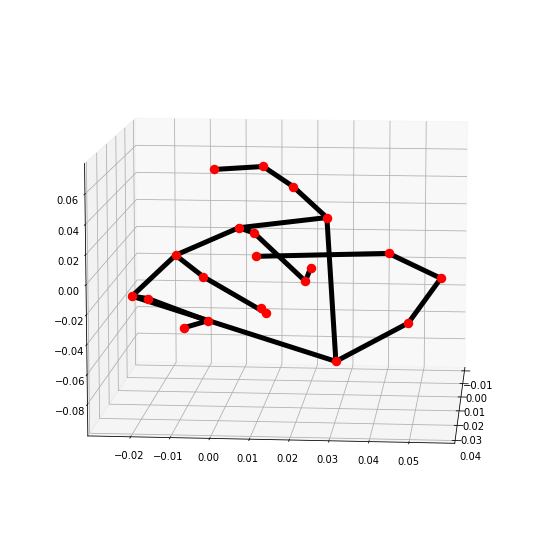

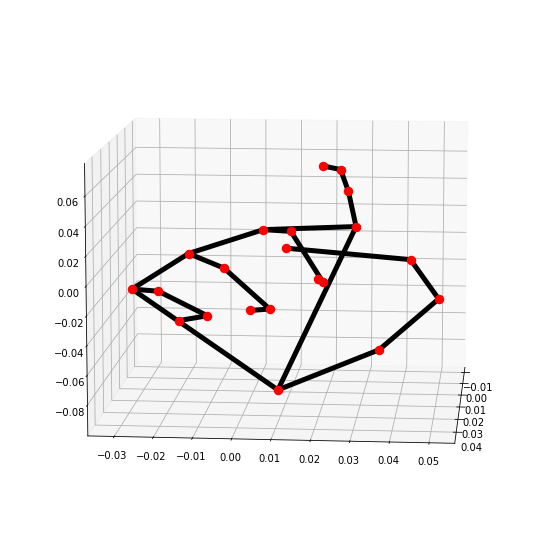

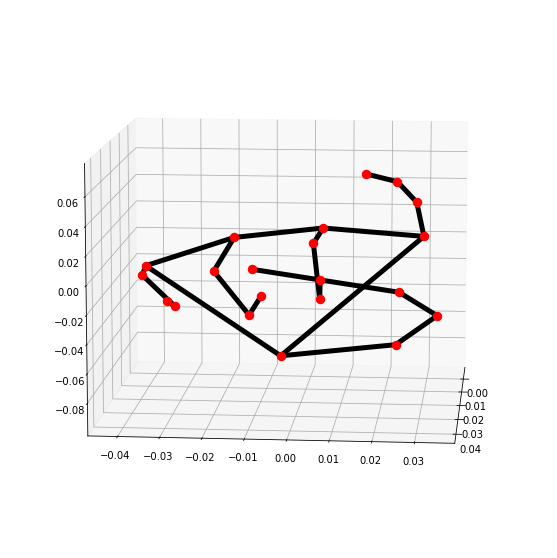

In [8]:
class_name = "z"

path = glob.glob("C:/Users/markc/OneDrive/Desktop/sign languange/sign-language-classification/sign languange classification/src/asl_train/z/*.jpeg")

for file in path:
    image = cv2.imread(file)


    with mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as hands:

            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if results.multi_hand_landmarks:
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=1, circle_radius=4),
                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=1, circle_radius=2),)

            # Export coordinates
            try:
                Hand = hand.landmark

                hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, ] for landmark in Hand]).flatten()) if Hand else np.zeros(21*4)

                row = hand_row

                row.insert(0, class_name)
                # Export to CSV
                with open('hand_coordinates.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row) 

                for hand_world_landmarks in results.multi_hand_world_landmarks:
                    mp_drawing.plot_landmarks(hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)


            except:
                pass

            cv2.imshow('Webcam Feed', image)
            cv2.waitKey(10)


cv2.destroyAllWindows()

# Train extracted dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
import pickle 

In [11]:
df = pd.read_csv('hand_coords.csv')

X = df.drop('class', axis=1) # features
y = df['class'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

C:\Users\markc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

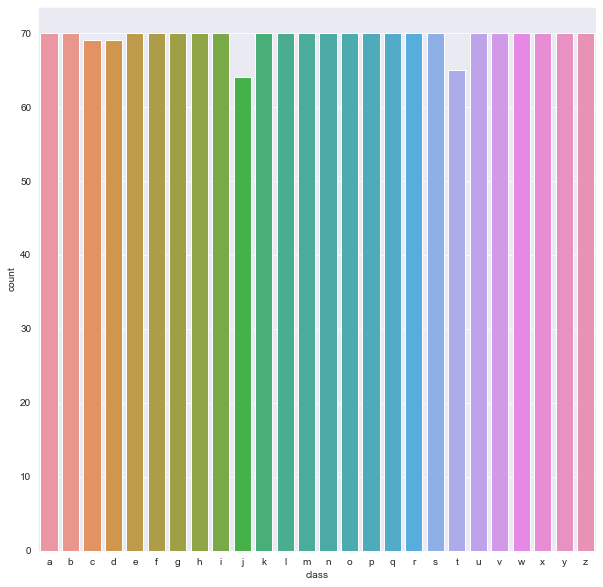

In [18]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(df['class'])

In [13]:
classifier = LogisticRegression(random_state = 1234)
classifier.fit(X_train.values, y_train)

y_pred = classifier.predict(X_test) 

C:\Users\markc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\markc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.46


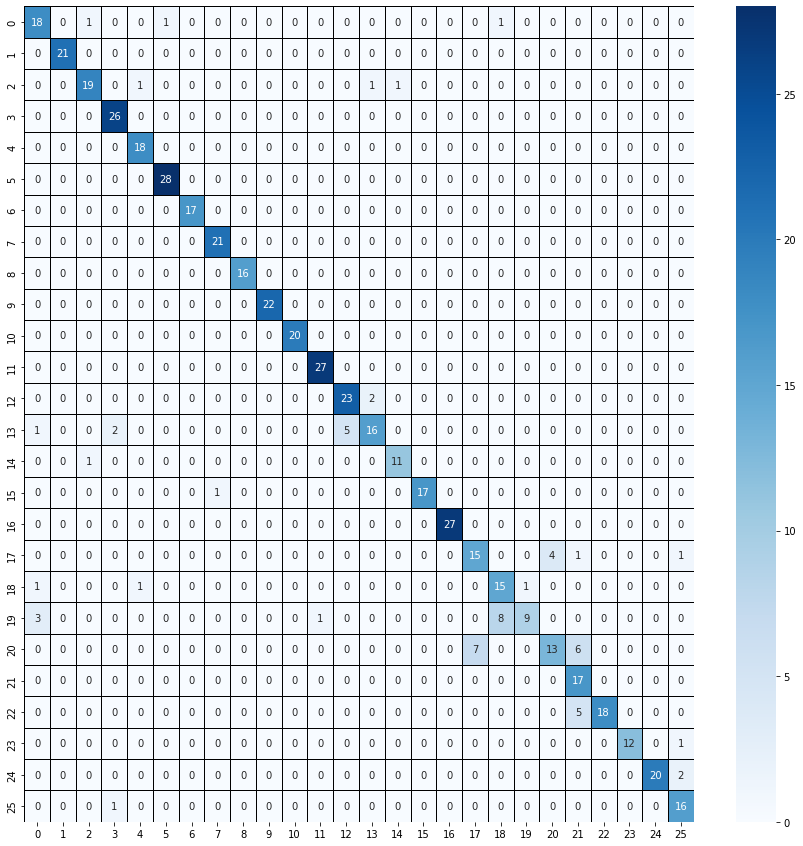

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')


TP = cm[0][0]
FP = cm[0][1]
TN = cm[1][1]
FN = cm[1][0]
N = (TP + FP) + (TN + FN)
#or 
#N = (TP + FN) + (FP + TN)
#where N is the total Population
accuracy = (TP + FP) / N
print(round(accuracy, 2))

In [19]:
from sklearn.metrics import f1_score
micro = f1_score(y_test, y_pred, average='micro')
macro = f1_score(y_test, y_pred, average='macro')
weighted = f1_score(y_test, y_pred, average='weighted')

print(micro, macro, weighted)

0.8876611418047882 0.8856781355974419 0.8842543628512629


In [21]:
with open('hand_sign_language.pkl', 'wb') as f:
    pickle.dump(classifier, f)

# Test trained data

In [22]:
with open('hand_sign_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [27]:
path = glob.glob("C:/Users/markc/OneDrive/Desktop/sign languange/sign-language-classification/sign languange classification/src/asl_test/j/*.jpg")

for file in path:
    image = cv2.imread(file)


    with mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as hands:

            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            if results.multi_hand_landmarks:
                #print(results.multi_hand_landmarks)
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=1, circle_radius=4), mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=1, circle_radius=2),)

            try:
                Hand = hand.landmark
                #print(Hand)
                hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, ] for landmark in Hand]).flatten()) if hand.landmark else np.zeros(21*4)

                row = hand_row

                X = pd.DataFrame([row])
                sign_language_class = model.predict(X)[0]
                sign_language_prob = model.predict_proba(X)[0]
                print(sign_language_class)

            except:
                pass


            cv2.imshow('Webcam Feed', image)
            cv2.waitKey(10)



cv2.destroyAllWindows()

z
z
z
z
z
z
z
z
z
j
j
d
d
j
z
j
j
z
z
j
z
z
j
j
j
j
j
j
z
